<a href="https://www.kaggle.com/code/jourdonlynch/hospital-data-breakdown?scriptVersionId=294862161" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 # Overview
The purpose of this analysis is to breakdown a fictional hospital dataset in order to gain insights into customer demographics and ascertain what conditions affect specific groups the most. In addition, condition statistics will be explored in reference to factors such as the length of stay, medication,and associated costs. 

# Dataset
The initial dataset consisted of 15 columns and 10,000 rows outlining patient information for a number of hospitals. Columns were broken down into the following:

* The **Name** column consists of the first and last name of patients admitted(e.g., John Doe)
* The **Age** column contains the age of each patient in years at the time of admission(e.g., "31", "24").
* The **Gender** column consists of the gender of each patient and returns either "Male" or "Female".
* The **Blood Type** column for each record holds 1 of 8 possible blood types (e.g., A-, O+, AB+)
* The **Medical Condition** column for each record holds 1 of 6 medical conditions (e.g.,"Arthritis", "Diabetes", "Hypertension")
* The **Date of Admission** column contains the admission year, month, and day a patient was admitted.
* The **Doctor** column contains the first and last name of the doctor assigned to a patient (e.g., "Paul Baker")
* The **Hospital** column contains the name of the hospital a patient was admitted to (e.g., "Walton LLC")
* The **Insurance Provider** column for each record holds 1 of 5 insurance providers(e.g., "Aetna")
* The **Billing Amount** column contains of the biling amount for each patient(e.g., "36874.89")
* The **Room Number** column contains the room number of each patient(e.g., "384")
* The **Admission Type** column holds one of three admission type for a patient (e.g., "Emergency", "Elective", "Urgent")
* The **Discharge Date** column contains the discharge year, month, and day a patient was released.
* The **Medication** column contains 1 of 5 medications given to patients (e.g., "Ibuprofen", "Penicillin", "Liptor")
* The **Test Results** column contains 1 of 3 results for testing (e.g., "Normal", "Abnormal", "Inconclusive")

The following 2 columns were added to the dataframe to aid in analysis:
* The **Age_Group** column consists of the age group a patient belongs to (e.g., "21-40")
* The **Days Hospitalized** column consists of the number of days patients spend in a hospital (e.g., "14")

#  Necessary Libraries

In [25]:
import pandas as pd # Importing Pandas to create dataframes and aid in analysis
import seaborn as sns # Importing Seaborn to create visualizations
import matplotlib.pyplot as plt # Importing pyplot to create visualizations

# Creating and Inspecting the Dataframe

In [26]:
# Creating the dataframe
df = pd.read_csv('/kaggle/input/healthcare-dataset/healthcare_dataset.csv')

# Inpecting dataframe columns
print(df.columns)
print(' ')

# Inspecting dataframe shape
print('rows, columns',df.shape)
print(' ')
display(df.head(1).T.rename(columns={0:'Value'})) # Viewing the general layout of the dataframe
print(' ')

# Checking for null values
display(df.isnull().sum().to_frame(name = 'null values'))

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')
 
rows, columns (55500, 15)
 


,Value
Name,Bobby JacksOn
Age,30
Gender,Male
Blood Type,B-
Medical Condition,Cancer
Date of Admission,2024-01-31
Doctor,Matthew Smith
Hospital,Sons and Miller
Insurance Provider,Blue Cross
Billing Amount,18856.281306


,null values
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


### Cleaning Dataframe

In [27]:
# Setting name column to capital case
df['Name'] = df['Name'].str.title()

## Patient breakdown by Demographic

In [28]:
# Creating "Age Group" column in dataframe
df['Age Group'] = pd.cut(df['Age'], bins=[-1, 20, 40, 60, 80, float('inf')], labels=['0-20', '21-40', '41-60', '61-80', '81+'])

# Creating dataframes for male and female patients
male_patients = df[df['Gender'] == 'Male'] 
female_patients = df[df['Gender'] == 'Female'] 

# Printing results
display(male_patients.head(2))
display(female_patients.head(2)) 

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Age Group
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,21-40
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,61-80


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Age Group
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,61-80
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,21-40


In [29]:
# Counting the number of patients by gender
gender_count = df.groupby('Gender')['Gender'].count() 

# Creating gender breakdown by percent
gender_pct = (df.groupby('Gender')['Gender'].count()/ df['Gender'].count())*100 

# Printing Results
display(gender_count.to_frame(name = 'Gender Count')) 
display(gender_pct.round(2).to_frame(name = 'Gender %')) 

,Gender Count
Gender,
Female,27726
Male,27774


,Gender %
Gender,
Female,49.96
Male,50.04


In [30]:
display(df['Age'].agg(['mean','min','max']).round(2).reset_index(name = 'value'))

,index,value
0,mean,51.54
1,min,13.00
2,max,89.00


In [31]:
# Mean, minimum, and maximum age of all patients
display(df['Age'].agg(['mean','min','max']).round(2).to_frame(name='All Patients Age'))
print()

# Male patients
display(male_patients['Age'].agg(['mean','min','max']).round(2).to_frame(name='Male Patients Age'))
print()

# Female patients
display(female_patients['Age'].agg(['mean','min','max']).round(2).to_frame(name='Female Patients Age'))

,All Patients Age
mean,51.54
min,13.00
max,89.00


,Male Patients Age
mean,51.5
min,13.0
max,89.0


,Female Patients Age
mean,51.58
min,13.00
max,89.00


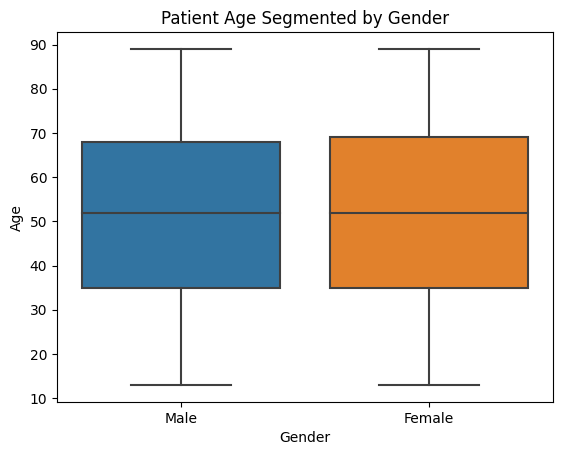

In [32]:
# Creating boxplot of age segmented by gender
plt.title('Patient Age Segmented by Gender')
sns.boxplot(data = df,x='Gender',y='Age')

# Visualizing plot
plt.show()

In [33]:
# Counting all patients by blood type and segmenting by gender
all_blood_type = df['Blood Type'].value_counts()
male_blood_type = male_patients['Blood Type'].value_counts()
female_blood_type = female_patients['Blood Type'].value_counts() 

# Printing results from most common blood type to least common
display(all_blood_type.to_frame(name = 'Total Blood Types'))
display(male_blood_type.to_frame(name = 'Male Blood Types'))
display(female_blood_type.to_frame(name = 'Female Blood Types'))


,Total Blood Types
Blood Type,
A-,6969
A+,6956
AB+,6947
AB-,6945
B+,6945
B-,6944
O+,6917
O-,6877


,Male Blood Types
Blood Type,
B+,3568
A-,3520
AB+,3509
AB-,3484
B-,3483
O+,3453
A+,3392
O-,3365


,Female Blood Types
Blood Type,
A+,3564
O-,3512
O+,3464
AB-,3461
B-,3461
A-,3449
AB+,3438
B+,3377


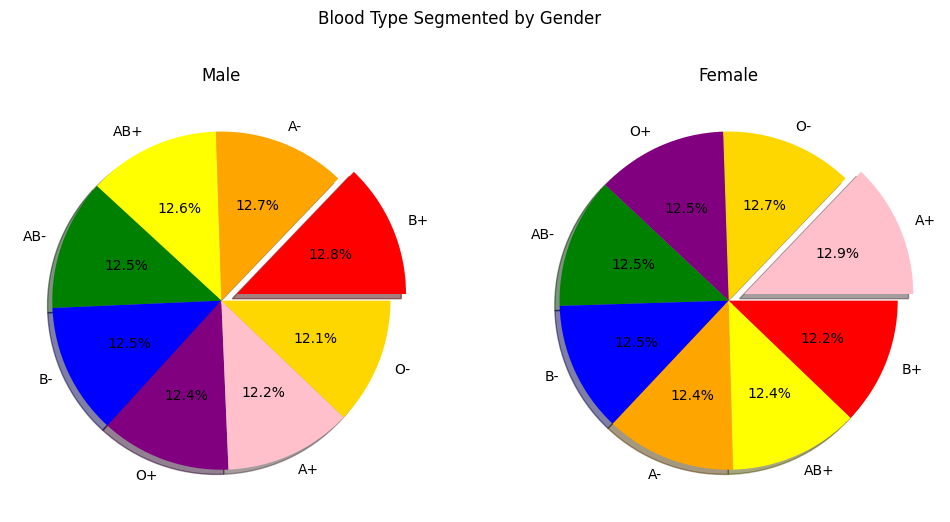

In [34]:
# Creating a figure with subplots
fig,ax = plt.subplots(1,2,figsize=(12,6))

# Creating title of main plot and subplots
plt.suptitle('Blood Type Segmented by Gender') 
ax[0].set_title('Male') 
ax[1].set_title('Female') 

# Creating labels and color palette for blood type 
blood_type_m = ['B+','A-','AB+','AB-','B-','O+','A+','O-']
blood_type_f = ['A+','O-','O+','AB-','B-','A-','AB+','B+']
rainbow_m = ['red','orange','yellow','green','blue','purple','pink','gold'] 
rainbow_f = ['pink','gold','purple','green','blue','orange','yellow','red']

# Setting plot orientation and creating pie charts for blood type seperated patient gender
plt.subplot(1,2,1) 
m_explode = (0.1,0,0,0,0,0,0,0) 
plt.pie(male_blood_type, explode = m_explode,labels = blood_type_m,colors = rainbow_m,autopct='%1.1f%%', shadow=True) 

plt.subplot(1,2,2) 
f_explode = (0.1,0,0,0.0,0,0,0,0)
plt.pie(female_blood_type, explode = f_explode,labels = blood_type_f, colors = rainbow_f,autopct='%1.1f%%', shadow=True); 


# Condition and Patient Care Statistics

In [35]:
# Segmenting and counting patients by medical condition and gender
all_medical_condition = df.groupby('Medical Condition')['Medical Condition'].count() 
male_medical_condition = male_patients.groupby('Medical Condition')['Medical Condition'].count() 
female_medical_condition = female_patients.groupby('Medical Condition')['Medical Condition'].count() 

# Printing results in descending order
display(all_medical_condition.sort_values(ascending = False).to_frame(name = 'Total Medical Conditions'))
display(male_medical_condition.sort_values(ascending = False).to_frame(name = 'Male Medical Conditions'))
display(female_medical_condition.sort_values(ascending = False).to_frame(name = 'Female Medical Conditions'))

,Total Medical Conditions
Medical Condition,
Arthritis,9308
Diabetes,9304
Hypertension,9245
Obesity,9231
Cancer,9227
Asthma,9185


,Male Medical Conditions
Medical Condition,
Diabetes,4653
Hypertension,4633
Asthma,4632
Cancer,4625
Arthritis,4622
Obesity,4609


,Female Medical Conditions
Medical Condition,
Arthritis,4686
Diabetes,4651
Obesity,4622
Hypertension,4612
Cancer,4602
Asthma,4553


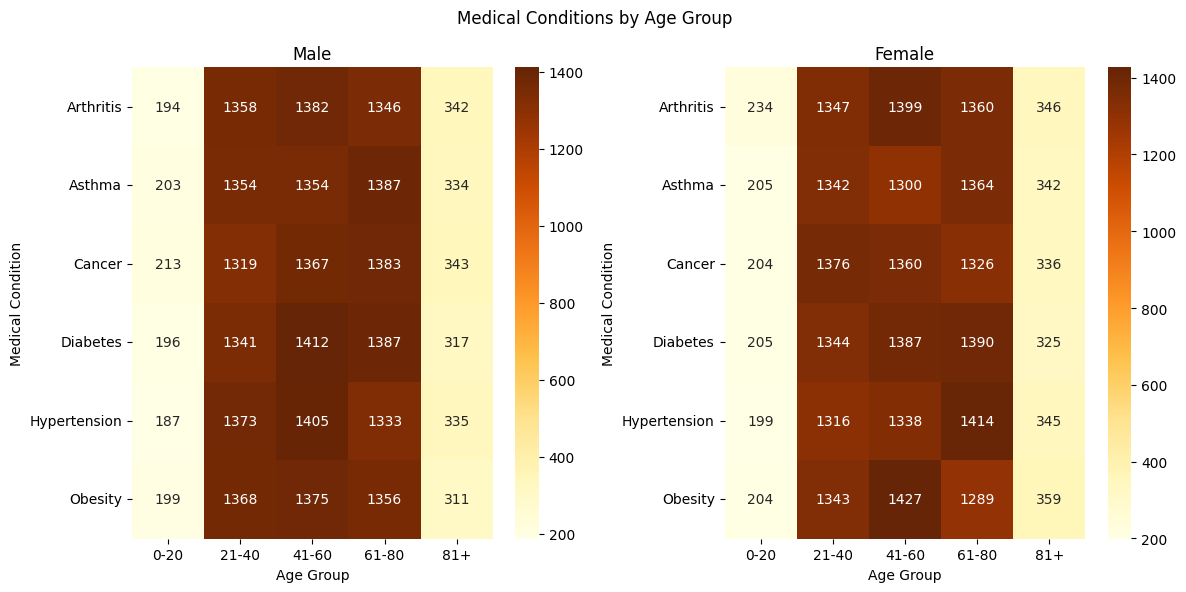

In [36]:
# Creating column in dataframe representing the age group a patient belongs to.
df['Age Group'] = pd.cut(df['Age'], bins=[-1, 20, 40, 60, 80, float('inf')], labels=['0-20', '21-40', '41-60', '61-80', '81+']) 

# Create a cross-tabulation of medical conditions and age groups
male_heatmap_data = pd.crosstab(male_patients['Medical Condition'], df['Age Group'])
female_heatmap_data = pd.crosstab(female_patients['Medical Condition'], df['Age Group'])


# Creating a figure with subplot
fig,ax = plt.subplots(1,2,figsize=(12,6))  

# Creating title of main plot and subplots
plt.suptitle('Medical Conditions by Age Group')
ax[0].set_title('Male') 
ax[1].set_title('Female') 

# Setting plot orientation and creating heatmaps for medical condition segmented by age group and seperated patient gender
plt.subplot(1,2,1)
sns.heatmap(male_heatmap_data, annot=True, fmt='d', cmap='YlOrBr') 

plt.subplot(1,2,2) 
sns.heatmap(female_heatmap_data, annot=True, fmt='d', cmap='YlOrBr') 

 # Adjusting subplot to fit in figure area
plt.tight_layout()

# Visualizing plot
plt.show() 

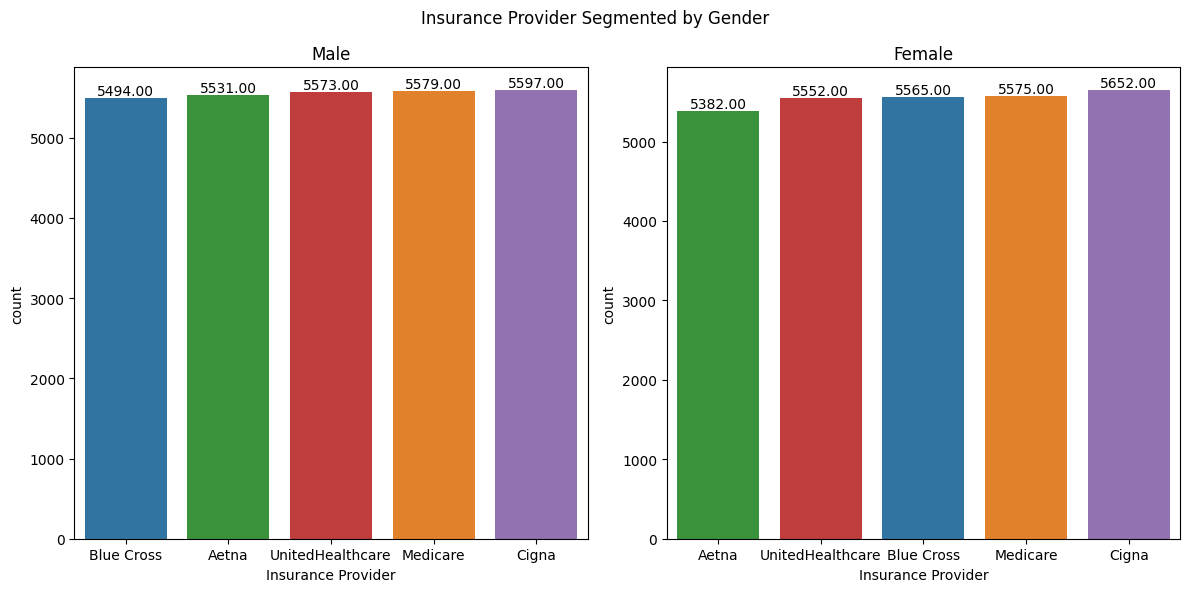

In [37]:
# Segmenting male and female patients by insurance provider
male_insurance_provider = male_patients['Insurance Provider'].value_counts().sort_values(ascending = True) 
female_insurance_provider = female_patients['Insurance Provider'].value_counts().sort_values(ascending = True) 

# Gathering unique insurace providers
insurance_providers = df['Insurance Provider'].unique()

# Creating plot
fig,ax = plt.subplots(1,2,figsize = (12,6)) 

# Creating color palette
color_palette = sns.color_palette('tab10', n_colors=len(insurance_providers))
color_dict = dict(zip(insurance_providers, color_palette))

# Creating title of main plot and subplots
plt.suptitle('Insurance Provider Segmented by Gender')
ax[0].set_title('Male') # Creating title of plot 1
ax[1].set_title('Female') # Creating totle of plot 2 

# Indexing count of insurance providers
m_order = male_insurance_provider.index
f_order = female_insurance_provider.index


# Setting plot orientation and creating countplots segmented by inusurance provider and seperated by patient gender 
plt.subplot(1,2,1)
ax = sns.countplot(male_patients,x = "Insurance Provider",order = m_order,palette = color_dict)
for i, v in enumerate(male_insurance_provider):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.subplot(1,2,2)
ax = sns.countplot(female_patients,x = 'Insurance Provider',order = f_order,palette = color_dict)
for i, v in enumerate(female_insurance_provider):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom')

# Adjusting subplots to fit in figure area
plt.tight_layout() 

# Visualizing plot
plt.show() 

# Care Provider Statistics

In [38]:
# Segmenting patients by insurance provider
display(df.groupby('Insurance Provider')['Insurance Provider'].count().sort_values(ascending = False).to_frame(name = 'Insurance Provider Count'))

,Insurance Provider Count
Insurance Provider,
Cigna,11249
Medicare,11154
UnitedHealthcare,11125
Blue Cross,11059
Aetna,10913


In [39]:
# Adding the Days Hospitalized to the dataframe
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Days Hospitalized'] = df['Discharge Date'] - df['Date of Admission']
df['Days Hospitalized'] = df['Days Hospitalized'].dt.total_seconds()/86400
display(df['Days Hospitalized'].to_frame(name = 'Days Hospitalized').head(5))

,Days Hospitalized
0,2.0
1,6.0
2,15.0
3,30.0
4,20.0


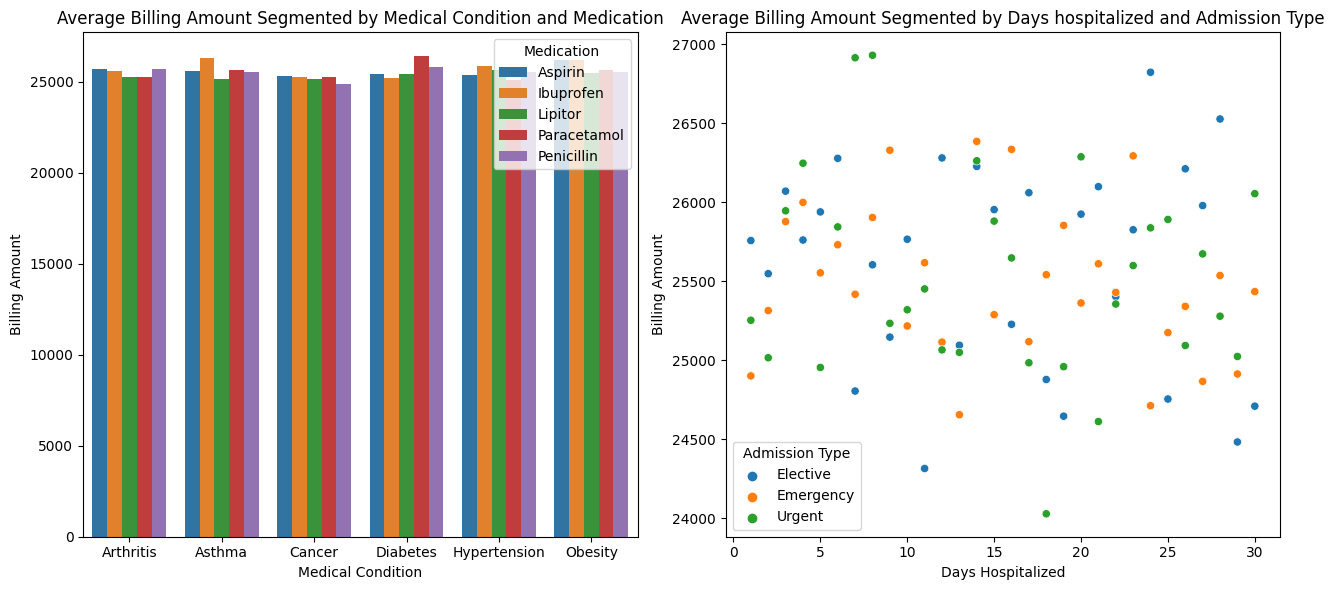

In [40]:
 fig,ax = plt.subplots(1,2,figsize = (13,6))
ax[0].set_title('Average Billing Amount Segmented by Medical Condition and Medication')
ax[1].set_title('Average Billing Amount Segmented by Days hospitalized and Admission Type')

# Grouping  average billing amount by medical condition and medication
avg_billing_amount_by_mc_and_m = df.groupby(['Medical Condition', 'Medication'])[['Billing Amount']].mean().reset_index()

avg_billing_amount_by_dh_and_at = df.groupby(['Days Hospitalized', 'Admission Type'])[['Billing Amount']].mean().reset_index()

# Creating barplot of billing amount grouped by medical condition segmented by medication
plt.subplot(1,2,1)
sns.barplot(data = avg_billing_amount_by_mc_and_m, x = 'Medical Condition',y = 'Billing Amount', hue = 'Medication')

plt.subplot(1,2,2)
sns.scatterplot(data = avg_billing_amount_by_dh_and_at, x = 'Days Hospitalized',y = 'Billing Amount', hue = 'Admission Type')

# Adjusting subplots to fit in figure area
plt.tight_layout()

# Visualizing plot
plt.show()

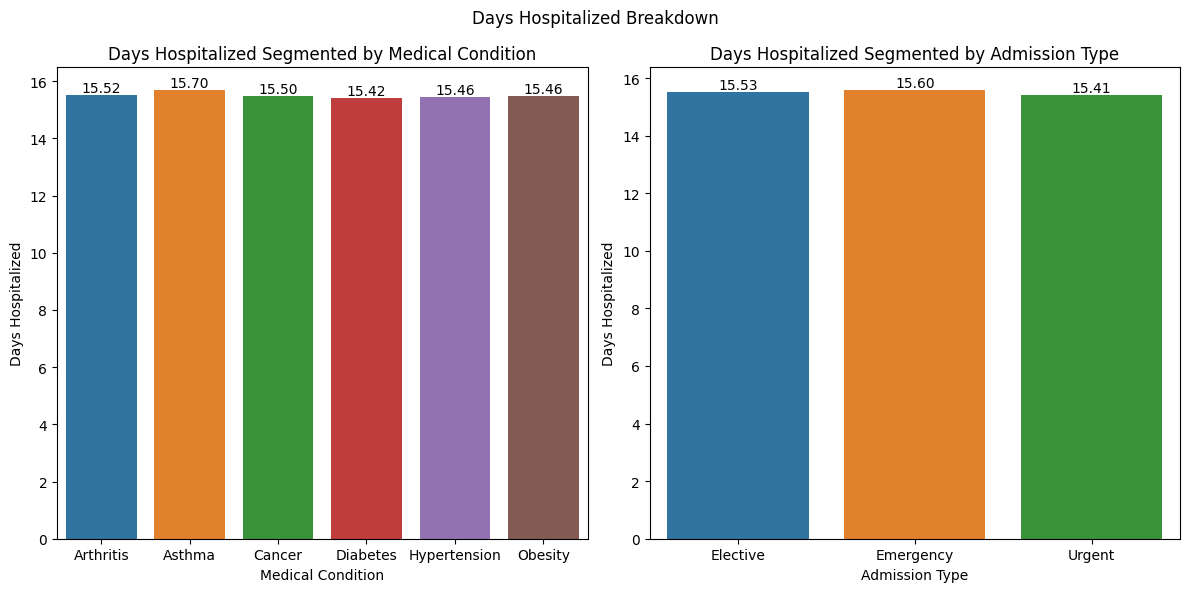

In [41]:
#Averaging days hospitalized by medical condition and test result
avg_days_hospitalized_by_medical_condition = df.groupby('Medical Condition')['Days Hospitalized'].mean()
avg_days_hospitalized_by_test_result = df.groupby('Admission Type')['Days Hospitalized'].mean()

#creating index to plot values
b_order = avg_days_hospitalized_by_medical_condition.index
a_order = avg_days_hospitalized_by_test_result.index

# Creating plot
fig,ax = plt.subplots(1,2,figsize= (12,6))

# Creating title of main plot and subplots
plt.suptitle('Days Hospitalized Breakdown')
ax[0].set_title('Days Hospitalized Segmented by Medical Condition')
ax[1].set_title('Days Hospitalized Segmented by Admission Type')



# Setting plot orientation and creating barplots of days hospitalized segmented by medical condition and admission type
plt.subplot(1,2,1)
ax = sns.barplot(data = df,x = df['Medical Condition'],y = df['Days Hospitalized'],order = b_order,errorbar = None)

for i,v in enumerate(avg_days_hospitalized_by_medical_condition):
 ax.text( i,v, f"{v:.2f}", ha='center', va='bottom')


plt.subplot(1,2,2)
ax = sns.barplot(data = df,x = df['Admission Type'],y = df["Days Hospitalized"],order = a_order,errorbar = None)

for i,v in enumerate(avg_days_hospitalized_by_test_result):
 ax.text( i,v, f"{v:.2f}", ha='center', va='bottom')

# Adjusting subplot to fit in figure area
plt.tight_layout()

# Visualizing plot
plt.show() 

,Admission Count
Admission Type,
Elective,18655
Urgent,18576
Emergency,18269


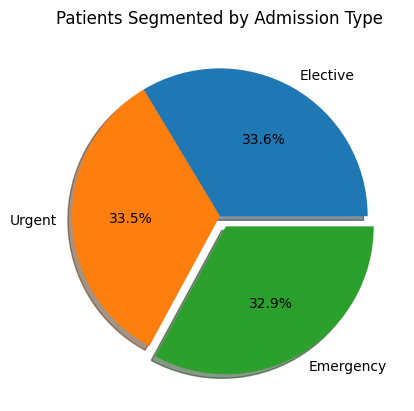

In [42]:
#Grouping patients by admission type
admission_count = df['Admission Type'].value_counts()
display(admission_count.to_frame(name = 'Admission Count'))

# Creating plot title
plt.title('Patients Segmented by Admission Type')
admission_label = ['Elective','Urgent','Emergency']


# Creating pie chart of patients segmented by admission type
a_explode = (0,0,0.08)
ax = plt.pie(admission_count,labels = admission_label, explode = a_explode, autopct='%1.1f%%', shadow=True)


#Visualising plot
plt.show()